# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 9</span>


### The Traveling Salesman Problem

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**.

Consider now the ordered sequence of cities, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, which goes from city 1 to the n$^{th}$ city. The path that minimizes the following loss/cost function:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

or 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$


(with $\vec{x}_{N+1}=\vec{x}_1$) is one particular permutation, P, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e. 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

Note also that any particular permutation of the ordered sequence of cities can be obtained from the combination of many simple permutations among pairs of cities.

We can express a possible path via a 1D vector whose elements, from the first to the last, are integers that represents the cities in the order in which the salesman would visit them; for example for $N=5$ cities one possible path is represented by the vector:

$$
\left[ 1, 3, 5, 4, 2 \right]
$$

**Alteratively**, we can express a possible path also via a configuration of a $N\times N$ 2D *Ising-like* model with the following bonds:
1. any row must have one and at most one up spin
2. any column must have one and at most one up spin,

all the other spins are down.

We can represent such a configuration with a $N\times N$ matrix whose elements are 1 (spin up) or 0 (spin down); for example, in the case of a TSP with 5 cities:
$$
\begin{bmatrix}
1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1\\
0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0\\
0 & 0 & 1 & 0 & 0\\
\end{bmatrix}
$$

You can interpret this matrix in the following way:
- column index represents time of visit: first colum = first visit, etc.
- row index represents the ordered sequence of cities: first row = first city, etc.

the previous matrix thus refers to the following sequence:

$$
\vec{x}_1, \vec{x}_2, \vec{x}_3, \vec{x}_4, \vec{x}_5 = 
\vec{c}_{1}, \vec{c}_{3}, \vec{c}_{5}, \vec{c}_{4}, \vec{c}_{2}
$$

and thus to the following *cost* of the path:

$$
L^{(2)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3|^2 + |\vec{c}_3-\vec{c}_5|^2 + |\vec{c}_5-\vec{c}_4|^2 +
|\vec{c}_4-\vec{c}_2|^2 + |\vec{c}_2-\vec{c}_1|^2
$$

or
$$
L^{(1)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3| + |\vec{c}_3-\vec{c}_5| + |\vec{c}_5-\vec{c}_4| +
|\vec{c}_4-\vec{c}_2| + |\vec{c}_2-\vec{c}_1|
$$


Note that, for this *ising-like* representation any particular permutation of the ordered sequence of cities can be obtained by a sequence of multiple pair permutations among rows and/or among columns.

**<span style="color:red">Warm suggestion: by using the 1D representation</span>** (but you can work with the representation you prefer or the one you are able to invent) ...

### Exercise 09.1

Write a code to solve the TSP with a **Genetic** algorithm (GA). Note that you should invent **some** *genetic-mutation* operators and a *genetic-crossover* operator which should preserve the bonds of the problem: the salesman must visit one and only one time every city and must be back to the first city in the end of the path.

Once the data structure of your code is ready, before you start coding your genetic operators, I warmly suggest you to code the creation of the starting population and to code a **check function** that verifies if every *individual* fulfils the bonds. Then check your starting population ... and use your check function every time you create a new individual.

You have to invent also a **selection** operator. 
The fitness and thus the order of the population should be obtained from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$. Once your starting population has been ordered on a fitness basis,
you have 2 possibilities:
1. write a selection operator which obtain the probability to select an individual from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$
2. write a selection operator which simply uses the order in the orderd population with $M$ individuals, e.g. select the individual $j$ with the algorithm: $j= int(M \times r^p)+1$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. 

<span style="color:red">Set the first city to always appear at position 1, so as to reduce the degeneration of the shortest route to be 2, which corresponds to walking the shortest route in clockwise and anti-clockwise directions.</span>

Then you can start introducing some *genetic-mutation* operators, for example:
1. pair permutation of cities (except for the first city), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$ (At this point you should already have such operator ... how have you generated the starting population?).
2. shift of $+n$ positions for $m$ contiguous cities (except for the first city and $m \lt N-1$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a $+2$ shift of the second and third cities.
3. permutation among $m$ contiguous cities (except for the first city) with other (different!) $m$ contiguous cities ($m<N/2$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a permutation of the second and third cities with the last 2.
4. inversion of the order in which they appear in the path of $m$ cities (except for the first city and $m \le N$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$ for the inversion of the cities from 2 to 4.

Every mutation will have its probability, $p^{(i)}_m$ to be called and typically $p^{(i)}_m < 10\%$, but before to include crossover you can check if the GA is able to perform a good *random search* using only mutation operators (in this case $p^{(i)}$ could be higher than in the previous suggestion).

At this point you can add a *crossover* operator (that fulfils the bonds and that you will call with probability $p^{(i)}_c > 50\%$):

given a selected mother and father, e.g. 
$$
\left[ 1, 2, 3, 4, 5 \right]\\
\left[ 1, 5, 4, 3, 2 \right] 
$$
1. cut their paths at the same position:
$$
\left[ 1, 2, 3 | 4, 5 \right]\\
\left[ 1, 5, 4 | 3, 2 \right] 
$$
2. conserve the first part of the paths:
$$
\left[ 1, 2, 3 | X, Y \right]\\
\left[ 1, 5, 4 | X, Y \right] 
$$
3. complete the paths with the missing cities adding them in the **order** in which they appear in the consort:
$$
\left[ 1, 2, 3 | 5, 4 \right]\\
\left[ 1, 5, 4 | 2, 3 \right] 
$$

Here you are: you have two sons that you can add to the new generation ... and so on!

Apply your code to the optimization of a path among 

- <span style="color:blue">34 cities randomly placed **on** a circumference</span>
- <span style="color:blue">34 cities randomly placed **inside** a square</span>

Show your results via:

- <span style="color:red">a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm</span>
- <span style="color:red">a picture of the best path in cartesian coordinates</span>

In questo esercizio si richiede l'implementazione di un algoritmo genetico per risolvere il problema del commesso viaggiatore, il quale consiste nel trovare il percorso che minimizza la distanza per viaggiare da una città all'altra, visitandole tutte una sola volta e ritornando alla città di partenza.

Gli algoritmi genetici sono particolarmente utili per affrontare problemi di ottimizzazione complessi e vincolati come questo, dove tecniche deterministiche come il gradient descendent potrebbero essere inefficaci (rischiando di convergere a minimi locali). Questa tecnica si basa sul concetto di selezione naturale, rappresentando l'informazione del problema (ad esempio l'ordine delle città) in una forma simile al DNA. Nel mio approccio, ho scelto di rappresentare ogni possibile percorso tra $N$ città con un vettore unidimensionale. Ho implementato diverse mutazioni e utilizzato queste per generare la popolazione iniziale.

Nello specifico, la funzione di crossover è implementata nel seguente modo:
- dopo aver riordinato la popolazione rispetto alla lunghezza di ogni path in ordine crescente,
- ad ogni generazione una frazione $p<1$ viene scelta per procreare nuovi individui;
- questi vengono scelti con una legge del tipo $j= int(N_{pop} \times r^p)+1$ dove r è un numero casuale tra 0 e 1, per favorire i percorsi più corti,
- e i figli che si ottengono, vengono inseriti nella popolazione andando a sostituire elementi scelti con la legge $j= int(N_{pop} \times r^{1/p})+1$;
- i figli vengono mutati con una probabilità $p_i$ per ogni tipo di mutazione ed essi non possono riprodursi durante questa generazione.

I parametri liberi che si possono settare sono:
- il numero di generazioni $N_{iter}$
- il numero di path (quindi la grandezza della popolazione) $N_{path}$
- la frazione di crossover $p_{cross}$
- l'esponente p prima citato
- le probabilità di mutazione $p_i$

Settare correttamente tutti questi parametri per ottenere il risultato ottimale, non è per niente banale; tuttavia, effettuando molte prove ho notato come l'elemento più importante per ottenere un risultato accettabile è la stocasticità. Conviene infatti tenere l'esponente p ad un valore simile a 1.5, in modo da non favorire troppo i percorsi corti; in questo modo la convergenza è molto più lenta, ma è molto meno probabile capitare in un minimo locale. Invece ho notato che aumentando le probabilità di mutazioni, il sistema fatica a convergere anche dopo molto tempo.

## 1. Città su una circonferenza

Per questo esercizio è richiesto di generare 34 città su una circonferenza e di trovare il percorso migliore, che ovviamente sarà quello senza incroci. Per questa simulazione ho scelto come parametri:

- $N_{iter}=500$
- $N_{path}=200$
- $p_{cross}=0.7$
- $p=2$
- $p_{mut}=0.1$

Grazie alla semplicità del problema la soluzione corretta viene trovata dopo solo un centinaio di generazioni.

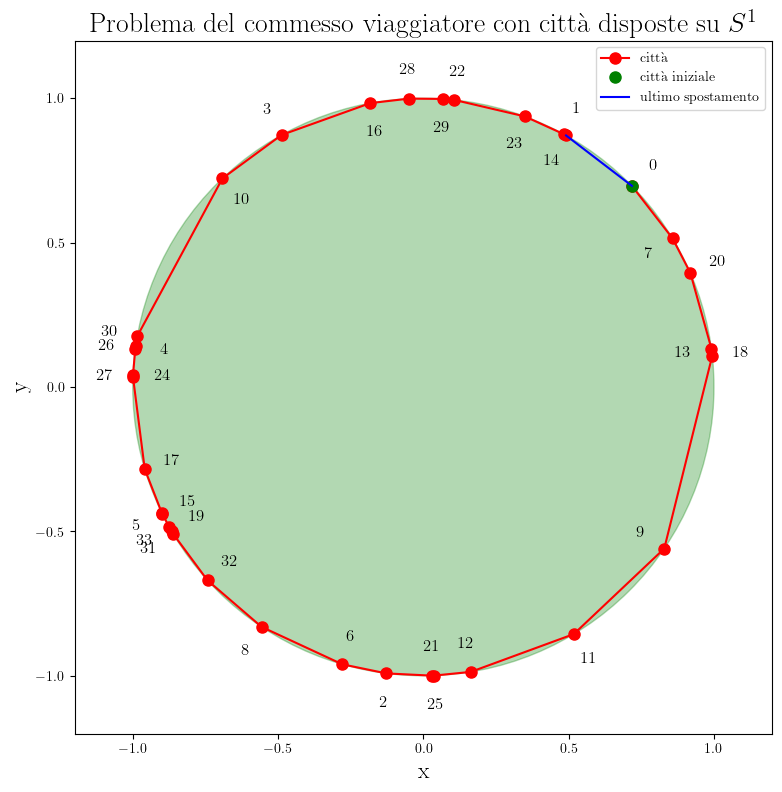

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# Impostazioni per utilizzare LaTeX nei testi
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Leggi i punti (x, y) dal file città.dat
with open('OUTPUT_CIRCLE/city.dat', 'r') as file:
    next(file)
    cities_data = [tuple(map(float, line.strip().split())) for line in file]

# Leggi l'ordine dei punti dal file risultati2.dat
with open('OUTPUT_CIRCLE/final_pop.dat', 'r') as file:
    next(file)
    order = list(map(int, file.readline().strip().split()))

# Estrai i punti nell'ordine specificato
ordered_cities = [cities_data[i] for i in order]

# Estrai le coordinate x e y dai punti
x = [city[0] for city in ordered_cities]
y = [city[1] for city in ordered_cities]

# Plotta la circonferenza
plt.figure(figsize=(9, 9))
circle = plt.Circle((0, 0), 1, color='green', fill=True, alpha = 0.3)
plt.gca().add_patch(circle)

# Plotta i punti
plt.plot(x, y, marker='o', linestyle='-', color='red', markersize=8, label='città')

# Plotta il punto iniziale
plt.plot(x[0], y[0], marker='o', linestyle='', color='green', markersize=8, label='città iniziale')

# Connetti l'ultimo punto al primo
plt.plot([x[-1], x[0]], [y[-1], y[0]], linestyle='-', color='blue', label='ultimo spostamento')

# Aggiungi i numeri ai punti
for i, (x_val, y_val) in enumerate(zip(x, y)):
    plt.text(x_val+(-1)**i*0.1*(x_val)/np.sqrt(x_val**2+y_val**2), y_val+(-1)**i*0.1*(y_val)/np.sqrt(x_val**2+y_val**2), str(order[i]), color='black', fontsize=12, ha='center', va='center')

plt.title('Problema del commesso viaggiatore con città disposte su $S^1$', fontsize=20)
plt.xlabel('x', fontsize=17)
plt.ylabel('y', fontsize=17)
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
#plt.grid(True)
plt.legend()
plt.show()


Lunghezza del percorso: 6.24306

Nel grafico successivo è presente la media delle lunghezze della prima metà della popolazione, ovvero quella più corta, in funzione della generazione.

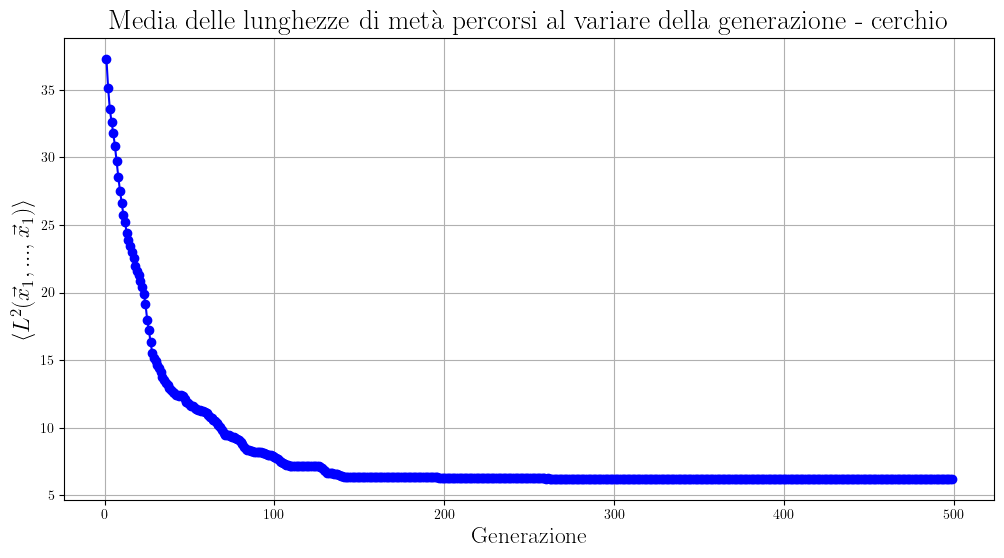

In [84]:
# Leggi le medie dal file mean.dat e plottale
generations = []
means = []

# Impostazioni per utilizzare LaTeX nei testi
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

with open('OUTPUT_CIRCLE/mean.dat', 'r') as file:
    next(file)  # Salta l'intestazione
    for i, line in enumerate(file):
        if i % 1 == 0:  # Considera solo una riga ogni mille
            generation, mean = map(float, line.strip().split())
            generations.append(generation)
            means.append(mean)

# Plotta le medie in funzione della generazione
plt.figure(figsize=(12, 6))
plt.plot(generations, means, marker='o', linestyle='-', color='blue')
plt.title('Media delle lunghezze di metà percorsi al variare della generazione - cerchio', fontsize=20)
plt.xlabel('Generazione', fontsize=17)
plt.ylabel(r'$\langle L^2(\vec{x}_1,...,\vec{x}_1) \rangle$', fontsize=17)
plt.grid(True)
plt.show()

Come si può osservare dopo circa 200 generazioni, la popolazione è fatta ormai quasi completamente dagli individui migliori e dunque le variazioni sono molto piccole (se non nulle). Questo tipo di comportamento accade nel momento in cui l'esponente p risulta essere pari o superiore a 2, favorendo una convergenza veloce ma con il rischio di bloccarsi in un minimo locale.

## 2. Città in un quadrato

Questo problema è leggermente più complicato, tuttavia con i seguenti parametri si riesce a ottenere qualla che credo sia la soluzione ottimale (confrontandomi con molti compagni bravi con algoritmi anche diversi, non abbiamo trovato una soluzione migliore):

- $N_{iter}=1000$
- $N_{path}=1000$
- $p_{cross}=0.7$
- $p=1.6$
- $p_{mut}=0.1$

A causa della maggiore complessità, ho aumentato il numero di path da 200 a 1000, ottenendo il seguente percorso:

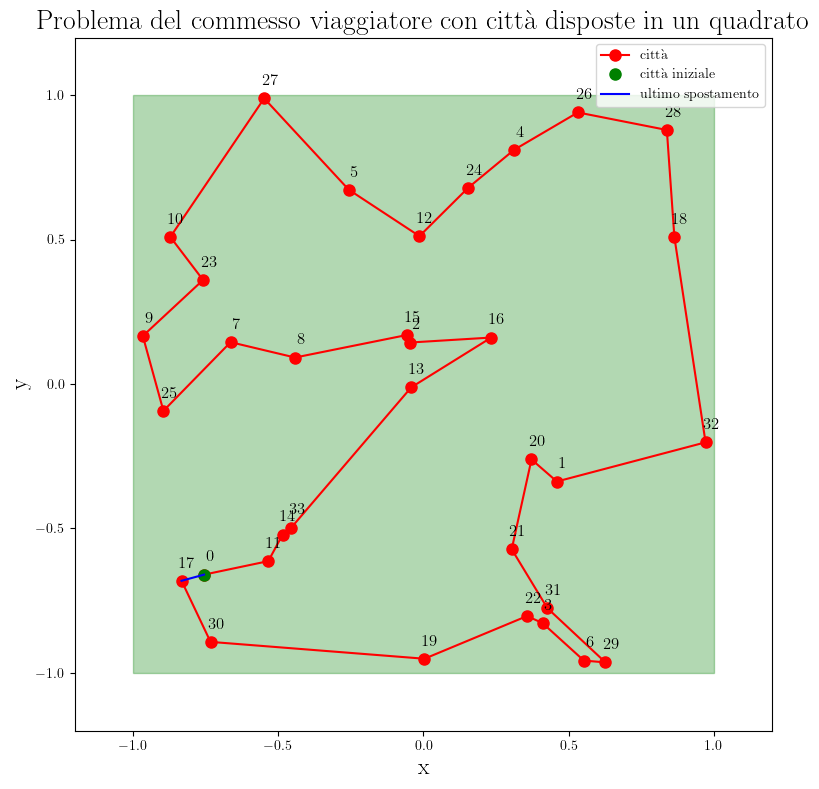

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Leggi i punti (x, y) dal file città.dat
with open('OUTPUT_SQUARE/city.dat', 'r') as file:
    next(file)
    cities_data = [tuple(map(float, line.strip().split())) for line in file]

# Leggi l'ordine dei punti dal file risultati2.dat
with open('OUTPUT_SQUARE/final_pop.dat', 'r') as file:
    next(file)
    order = list(map(int, file.readline().strip().split()))

# Estrai i punti nell'ordine specificato
ordered_cities = [cities_data[i] for i in order]

# Estrai le coordinate x e y dai punti
x = [city[0] for city in ordered_cities]
y = [city[1] for city in ordered_cities]

# Plotta la circonferenza
plt.figure(figsize=(9, 9))
square = plt.Rectangle((-1, -1), 2, 2, color='green', fill=True, alpha = 0.3)
plt.gca().add_patch(square)

# Plotta i punti
plt.plot(x, y, marker='o', linestyle='-', color='red', markersize=8, label='città')

# Plotta il punto iniziale
plt.plot(x[0], y[0], marker='o', linestyle='', color='green', markersize=8, label='città iniziale')

# Connetti l'ultimo punto al primo
plt.plot([x[-1], x[0]], [y[-1], y[0]], linestyle='-', color='blue', label='ultimo spostamento')

# Aggiungi i numeri ai punti
for i, (x_val, y_val) in enumerate(zip(x, y)):
    plt.text(x_val+0.02, y_val+0.06, str(order[i]), color='black', fontsize=12, ha='center', va='center')

plt.title('Problema del commesso viaggiatore con città disposte in un quadrato', fontsize=20)
plt.xlabel('x', fontsize=17)
plt.ylabel('y', fontsize=17)
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
#plt.grid(True)
plt.legend()
plt.show()


Lunghezza del percorso:  9.96852

Come prima, nel grafico seguente si può trovare la media delle lunghezze della prima metà della popolazione in funzione della generazione:

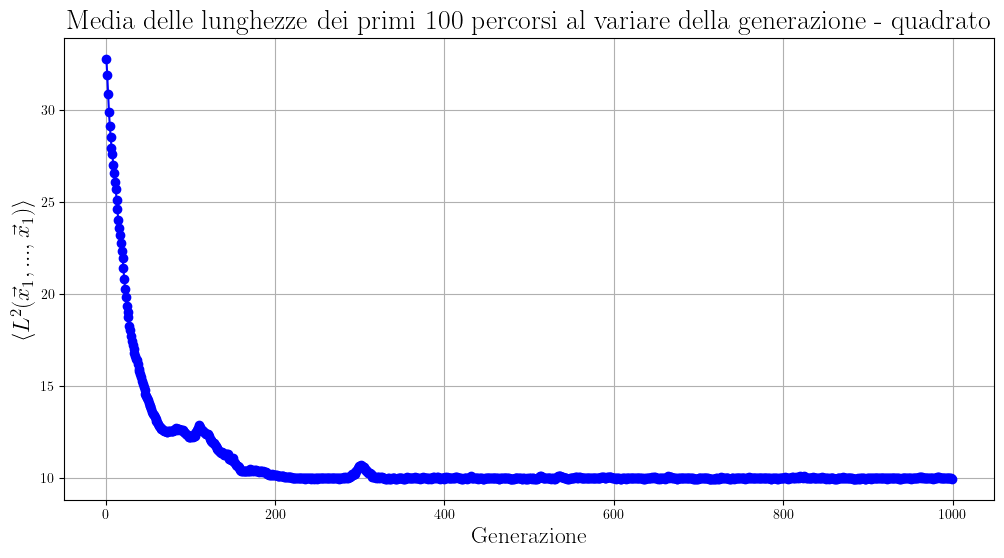

In [86]:
# Leggi le medie dal file mean.dat e plottale
generations = []
means = []

with open('OUTPUT_SQUARE/mean.dat', 'r') as file:
    next(file)  # Salta l'intestazione
    for i, line in enumerate(file):
        if i % 1 == 0:  # Considera solo una riga ogni mille
            generation, mean = map(float, line.strip().split())
            generations.append(generation)
            means.append(mean)

# Plotta le medie in funzione della generazione
plt.figure(figsize=(12, 6))
plt.plot(generations, means, marker='o', linestyle='-', color='blue')
plt.title('Media delle lunghezze dei primi 100 percorsi al variare della generazione - quadrato', fontsize=20)
plt.xlabel('Generazione', fontsize=17)
plt.ylabel(r'$\langle L^2(\vec{x}_1,...,\vec{x}_1) \rangle$', fontsize=17)
plt.grid(True)
plt.show()

Anche in questo caso dopo 1000 generazioni, il valore rimane costante. Questo significa che la maggior parte della popolazione è formata dagli individui migliori e la media complessiva è difficile da diminuire.